In [1]:
import math
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [2]:
def plot_sequence(xy, b=2, m=6, colors='black', plot_lines=False, shift_points=True):
    # Plot the curve and the points
    shift_x = 0.5/(b**(m//2)) if (shift_points) else 0.0
    shift_y = shift_x
    plt.scatter(xy[:,0] + shift_x, xy[:,1] + shift_y, zorder=2, color=colors);
    if plot_lines:
        plt.plot(xy[:,0] + shift_x, xy[:,1] + shift_y, zorder=1, c='gray');
    plt.axis('square');
    plt.grid(True);
    plt.xticks(np.linspace(0, 1, b**(m//2)+1));
    plt.yticks(np.linspace(0, 1, b**(m//2)+1));
    plt.axis([0,1,0,1]);

In [3]:
# Create a vector of linearly blended colors that can be used in
# matplolib as a colormap for `pyplot.scatter` for example.
#
# This function takes as input the number of colors points and
# optionnaly, the first and last colors.
#
def color_vector(N, c0=[1,0,0], c1=[0,0,1]):
    colors = np.zeros((N, 3))
    for i in range(0, N):
        u0 = float(i)/float(N-1)
        u1 = 1.0 - u0
        colors[i, 0] = u0*c0[0] + u1*c1[0]
        colors[i, 1] = u0*c0[1] + u1*c1[1]
        colors[i, 2] = u0*c0[2] + u1*c1[2]
    return colors;

## The Golden Ratio nD Sequence

1.324717957244746
[0.75487767 0.56984029]


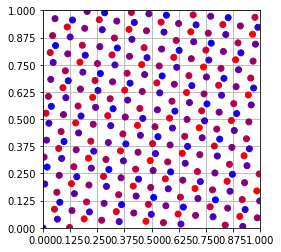

In [4]:
# Number of dimensions. 
d=2

# number of required points 
n=256

# Use Newton-Raphson-Method to calculate g=phi_d 
# or you could just hard-code it. 
# phi(1) = 1.61803398874989484820458683436563 
# phi(2) = 1.32471795724474602596090885447809 
def phi(d): 
  x=1.0000 
  for i in range(100): 
    x = x-(pow(x,d+1)-x-1)/((d+1)*pow(x,d)-1) 
  return x

g = phi(d) 
print(g)
alpha = np.zeros(d) 
for j in range(d): 
  alpha[j] = pow(1.0/g,j+1.0) % 1.0 

z = np.zeros((n, d)) 
print(alpha)

# This number can be any real number. 
# Default setting is typically is seed=0
# But seed = 0.5 is marginally better in theory and practice. 
for i in range(n): 
  z[i] = (alpha*(i)) % 1.0 


# Create a color range
COLORS = color_vector(n)

# Plot the curve and the points
for i in range(0, d-1):
    fig, ax = plt.subplots();
    plot_sequence(z[...,i:i+2], colors=COLORS, shift_points=False)